In [546]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("complete_dataset.csv")


In [547]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [549]:
#Convert date from objec to datetime
df['date']=pd.to_datetime(df['date'])

In [550]:
#Fill null values with median
df.rainfall.fillna(df.rainfall.median(), inplace=True)

df.solar_exposure.fillna(df.solar_exposure.median(), inplace=True)

In [551]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [552]:
#To extract the year
df['Year'] = df['date'].dt.year
#To extract the month
df['Month'] = df['date'].dt.month
#To extract the day
df['Day'] = df['date'].dt.day

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


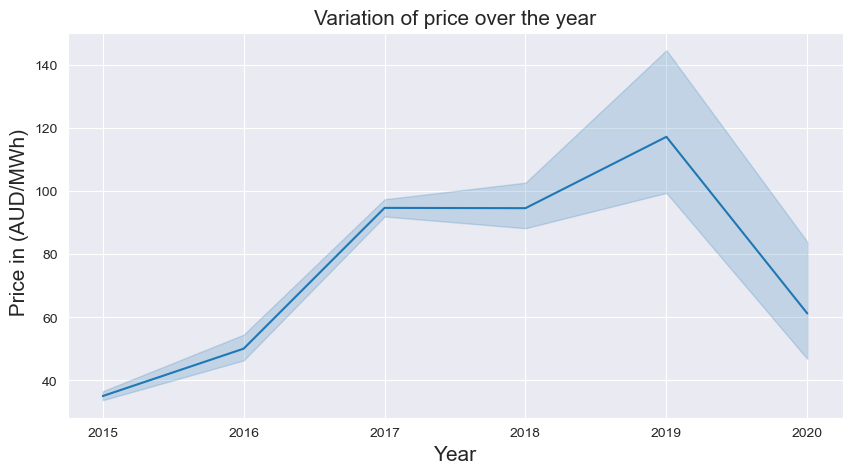

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
g=sns.lineplot(data=df, x='Year', y='RRP')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15) #Recommended retail prince in Australian dollars per Megawatthour
g.set_title('Variation of price over the year', fontsize=15)
g.set_xlabel('Year', fontsize=15)
plt.show()

C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\3164113949.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p1=sns.lineplot(data=df, x='Month', y='RRP', hue='Year', palette=colors, ci=None,
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\3164113949.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p2=sns.lineplot(data=df_inner, x='Day', y='RRP'

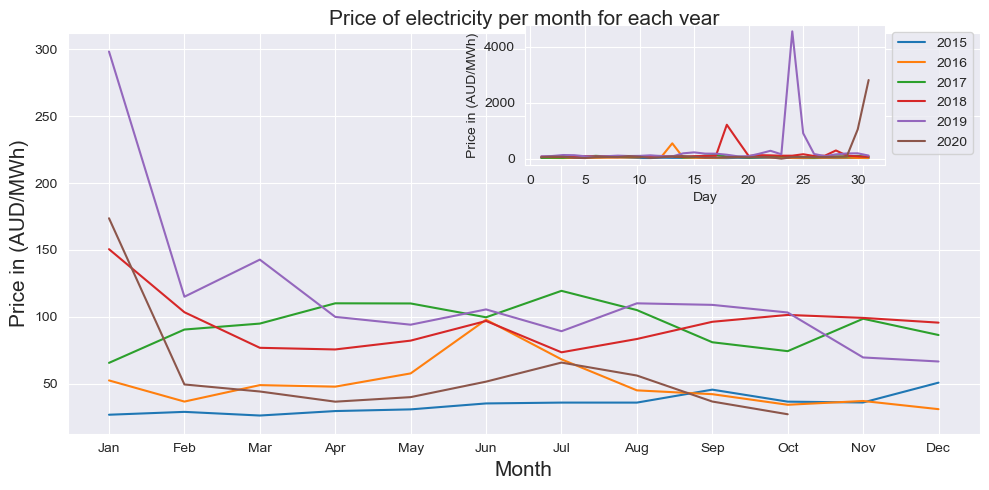

In [554]:
fig, ax1 = plt.subplots(figsize=(10,5))
# ------------bigger plot
Average_monthly_demand = df.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Month', y='RRP', hue='Year', palette=colors, ci=None,
                legend=False)
p1.set_xticks(range(1, 13))
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Price in (AUD/MWh)", fontsize=15)
p1.set_title('Price of electricity per month for each year', fontsize=15)
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# -------------Inner plot ------
df_inner=df.loc[df['Month']==1]
l, b, h, w = 0.53, 0.66, .28, .36 #< setting for inset
ax2 = fig.add_axes([l, b, w, h])
Average_monthly_demand = df_inner.groupby(['Day', 'Year'])['RRP'].mean().reset_index()
color = sns.color_palette("tab10", n_colors=6)
p2=sns.lineplot(data=df_inner, x='Day', y='RRP', hue='Year', palette=color, ci=None)
p2.set_xlabel("Day", fontsize=10)
p2.set_ylabel("Price in (AUD/MWh)", fontsize=10)

p2.legend(bbox_to_anchor= (1,1))
plt.show()

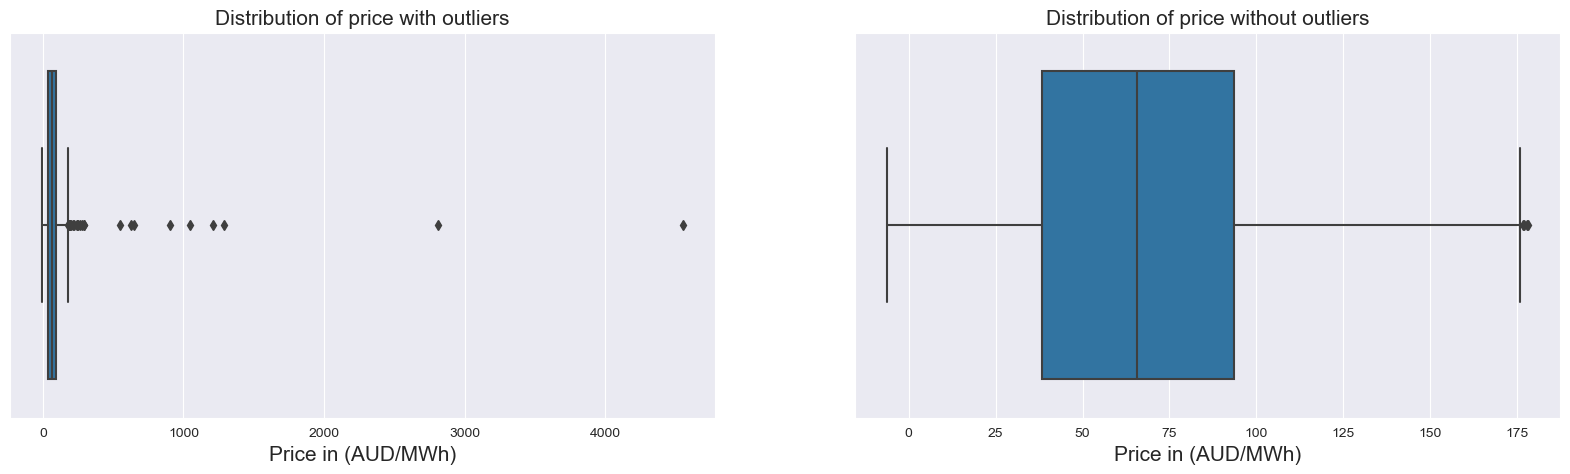

In [555]:
#Visualizing the price distribution
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.boxplot(x=df["RRP"])
g.set_title('Distribution of price with outliers', fontsize=15)
g.set_xlabel(r"Price in (AUD/MWh)",fontsize=15)
df_1=df.copy()

#Setting the quantile range
Q1 = df_1['RRP'].quantile(0.25)
Q3 = df_1['RRP'].quantile(0.75)
IQR = Q3 - Q1

#Roming the outliers
df_1 = df_1[(df_1['RRP'] > (Q1 - 1.5 * IQR)) & (df_1['RRP'] < (Q3 + 1.5 * IQR))]
plt.subplot(1,2,2)
g1=sns.boxplot(x=df_1["RRP"])
g1.set_xlabel("Price in (AUD/MWh)",fontsize=15)
g1.set_title('Distribution of price without outliers', fontsize=15);


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\334093530.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

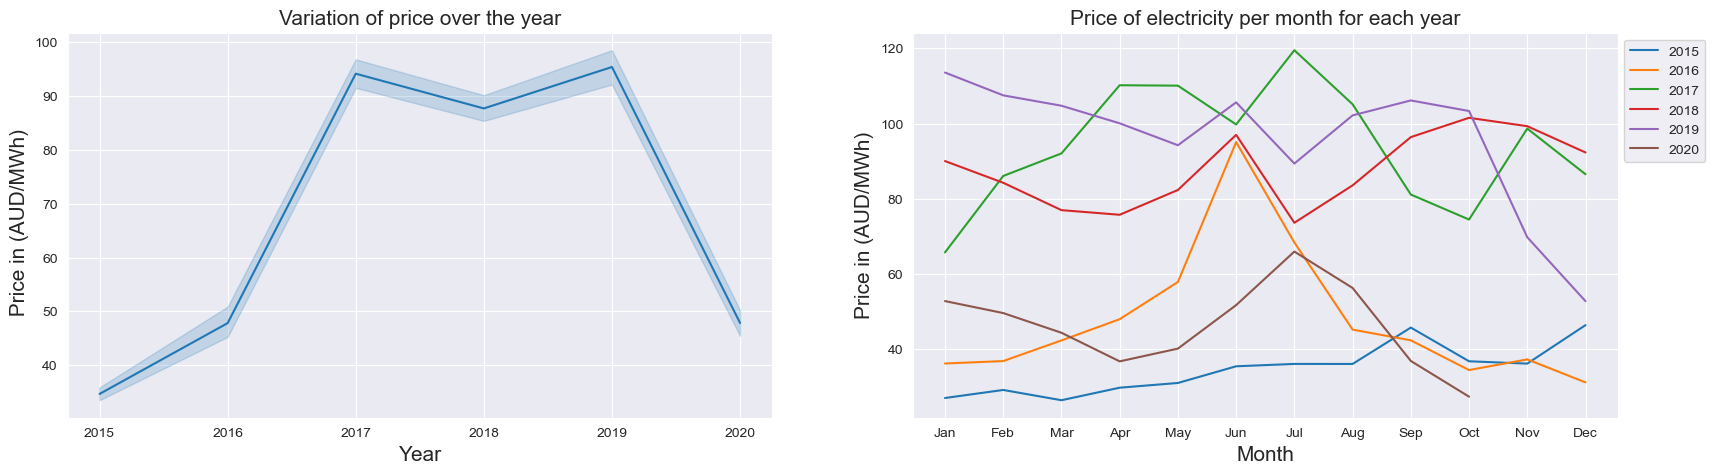

In [556]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='RRP')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15)
g.set_title('Variation of price over the year', fontsize=15)
g.set_xlabel('Year', fontsize=15)



plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13))
g.set_title('Price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.,1))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

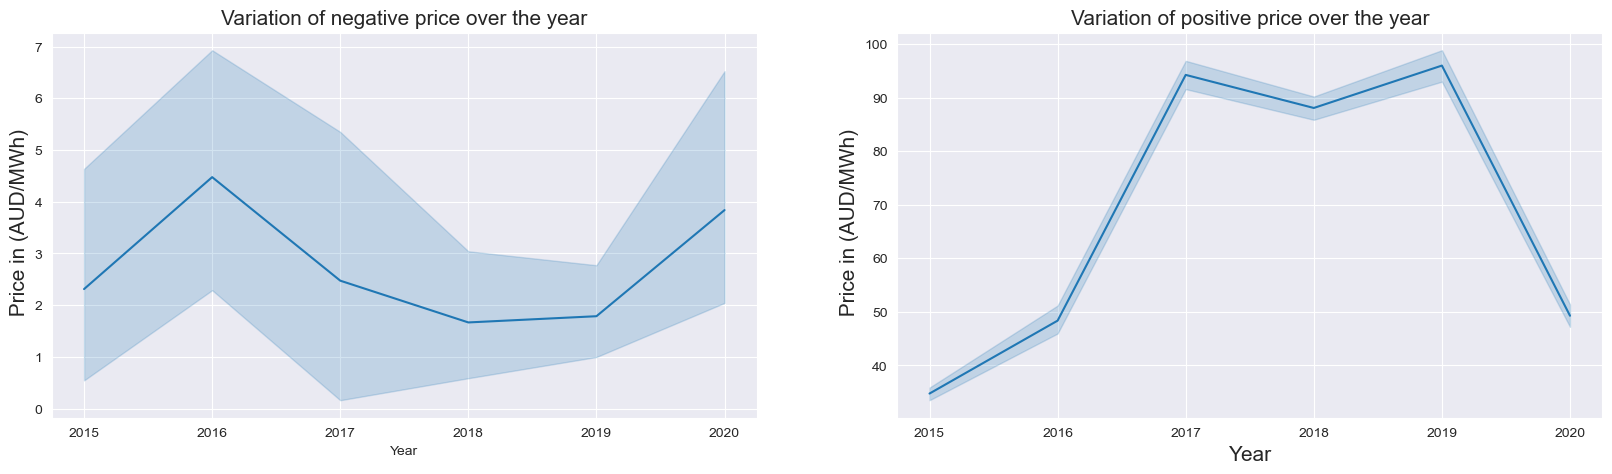

In [557]:
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='RRP_negative_1')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15)
g.set_title('Variation of negative price over the year', fontsize=15)

plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='Year', y='RRP_positive')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15)
g.set_title('Variation of positive price over the year', fontsize=15)
g.set_xlabel('Year',fontsize=15)
plt.show()

C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\1044916740.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='RRP_negative_1', hue='Year', palette=colors, ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\1044916740.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month'

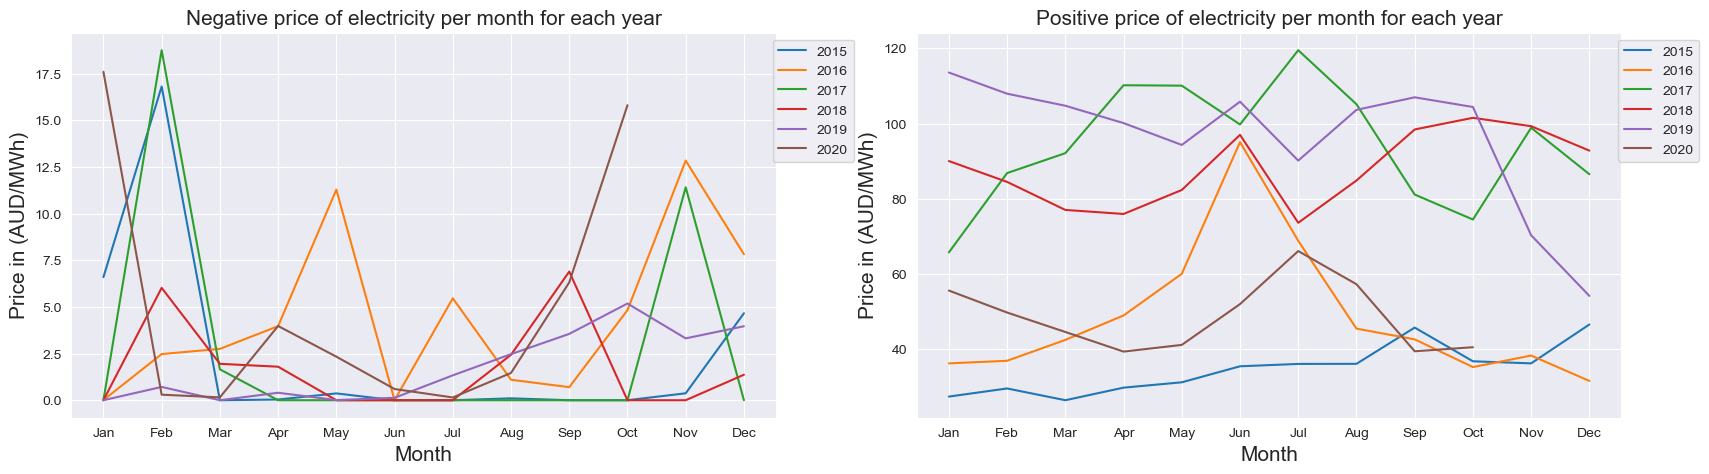

In [558]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_negative_1'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_negative_1', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13))
g.set_title('Negative price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))


plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_positive'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_positive', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13))
g.set_title('Positive price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\3285733560.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.lineplot(data=df_1, x='Month', y='min_temperature', hue='Year', palette=colors, ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\3285733560.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g3=sns.lineplot(data=df_1, x='Mont

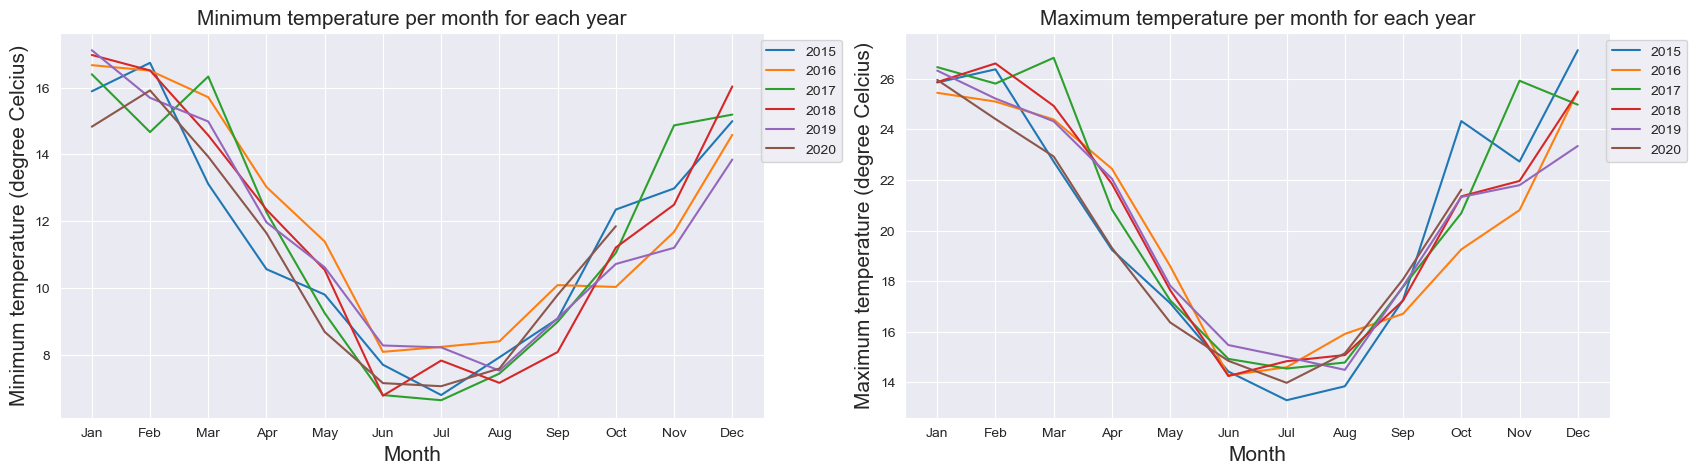

In [559]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['min_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='min_temperature', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13))
g.set_title('Minimum temperature per month for each year', fontsize=15)
g.set_ylabel('Minimum temperature (degree Celcius)', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))



plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['max_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g3=sns.lineplot(data=df_1, x='Month', y='max_temperature', hue='Year', palette=colors, ci=None)
g3.set_xticks(range(1, 13))
g3.set_title('Maximum temperature per month for each year', fontsize=15)
g3.set_ylabel('Maximum temperature (degree Celcius)', fontsize=15)
g3.set_xlabel('Month', fontsize=15)
g3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g3.legend(bbox_to_anchor= (1.12,1))
plt.show()

In [560]:
#Defining the seasons
def season(month):
  season_month = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
  return season_month.get(month)

season_list = []
for month in df_1['Month']:
  seasons = season(month)
  season_list.append(seasons)

df_1['Season'] = season_list

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A S Computer\AppData\Local\Temp\ipykernel_17732\1567833193.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g=sns.lineplot(data=df_1, x='Season', y='RRP', hue='Year',palette=colors, ci=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

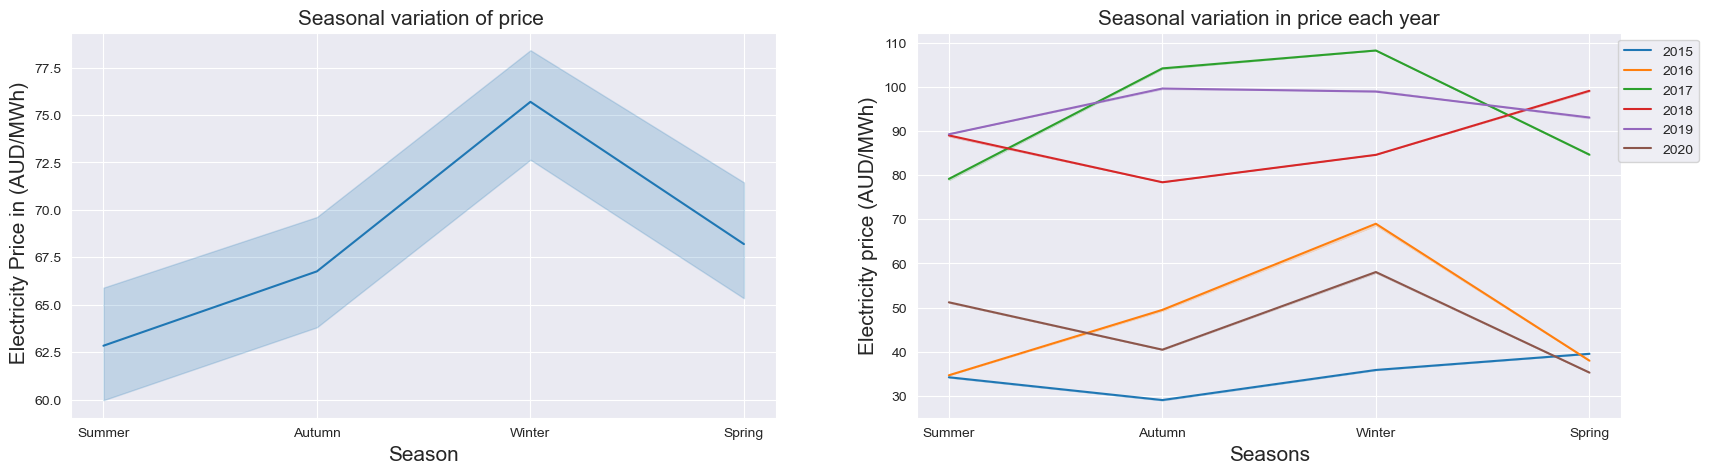

In [561]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Season', y='RRP')
g.set_ylabel(' Electricity Price in (AUD/MWh)', fontsize=15)
g.set_title('Seasonal variation of price ', fontsize=15)
g.set_xlabel('Season', fontsize=15)


plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Season', y='RRP', hue='Year',palette=colors, ci=False)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons', fontsize=15)
g.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
g.set_title('Seasonal variation in price each year', fontsize=15)
plt.show()

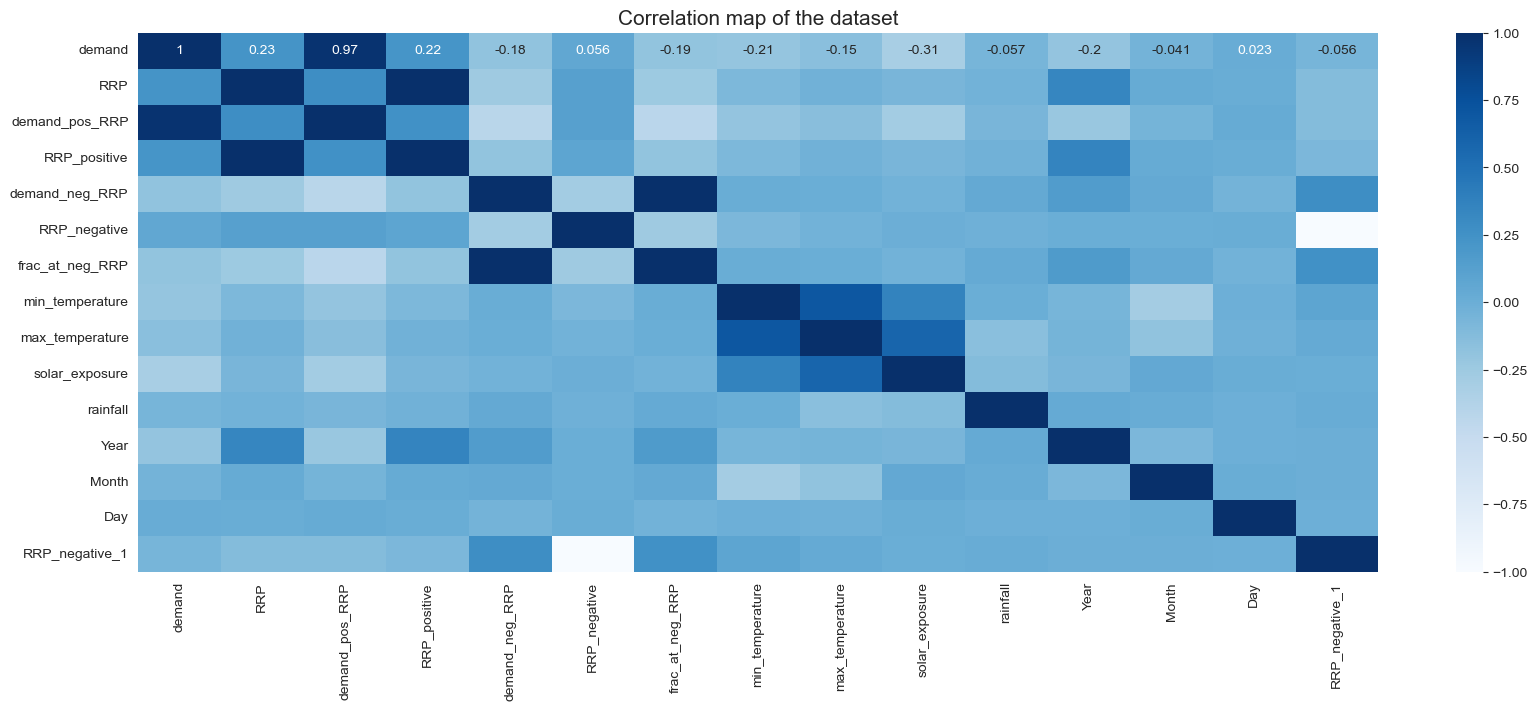

In [562]:
numeric_df = df_1.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(20,7))
g=sns.heatmap(corr,cmap="Blues", annot=True)
g.set_title('Correlation map of the dataset', fontsize=15)
plt.show()


In [563]:
df_scaled=pd.DataFrame(df_1, columns=['RRP','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                           'max_temperature', 'solar_exposure', 'rainfall'])

In [564]:
#Bringing in the date, holiday and schooldays features into the scaled dataframe
df_scaled['date']=df_1['date']
# Define a dictionary mapping 'Y' to 1 and 'N' to 0
mapping = {'Y': 1, 'N': 0}

# Convert 'school_day' and 'holiday' columns using the map function
df_scaled['school_day'] = df_1['school_day'].map(mapping)
df_scaled['holiday'] = df_1['holiday'].map(mapping)


In [565]:
#Drop all null values
df_ready=df_scaled.dropna()

In [566]:
df_ready.head()

,RRP,demand,demand_pos_RRP,demand_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,date,school_day,holiday
0,25.633696,99635.030,97319.240,2315.790,13.3,26.9,23.6,0.0,2015-01-01,0,1
1,33.138988,129606.010,121082.015,8523.995,15.4,38.8,26.8,0.0,2015-01-02,0,0
2,34.564855,142300.540,142300.540,0.000,20.0,38.2,26.5,0.0,2015-01-03,0,0
3,25.005560,104330.715,104330.715,0.000,16.3,21.4,25.2,4.2,2015-01-04,0,0
4,26.724176,118132.200,118132.200,0.000,15.0,22.0,30.7,0.0,2015-01-05,0,0


In [567]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error

In [568]:
#Training dataset
df_train = df_ready[df_ready.date<='2019-01-01']
#Test dataset
df_test =  df_ready[df_ready.date>'2019-01-01']
#A reserved copy of the test dataset for plotting
df_resid = df_ready[df_ready.date>'2019-01-01']

#Extract the target feature for training and testing
y_train=df_train["RRP"]
y_test=df_test["RRP"]

#Extracting the independent features for training and testing
X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
df_train.shape

(1451, 11)

In [569]:
# Train the LightGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1451, number of used features: 9
[LightGBM] [Info] Start training from score 66.025086


LGBMRegressor()

In [570]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error


# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print("MAE for LightGBM:", mae_lgbm)

# Calculate R-squared (R2)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("R-squared (R2) for LightGBM:", r2_lgbm)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_lgbm = mean_absolute_percentage_error(y_test, y_pred_lgbm)
print("MAPE for LightGBM:", mape_lgbm)


MAE for LightGBM: 27.73055996841191
R-squared (R2) for LightGBM: -0.04673902150973852
MAPE for LightGBM: 0.43799866580809954


In [571]:
X_train.head()

,demand,demand_pos_RRP,demand_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,99635.030,97319.240,2315.790,13.3,26.9,23.6,0.0,0,1
1,129606.010,121082.015,8523.995,15.4,38.8,26.8,0.0,0,0
2,142300.540,142300.540,0.000,20.0,38.2,26.5,0.0,0,0
3,104330.715,104330.715,0.000,16.3,21.4,25.2,4.2,0,0
4,118132.200,118132.200,0.000,15.0,22.0,30.7,0.0,0,0


In [572]:
import pandas as pd

import numpy as np

# Convert DataFrame to NumPy array
X_train_array = X_train.values

# Train the LSTM model
X_train_lstm = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the LSTM model with increased complexity
lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.3),  # Add dropout for regularization
    LSTM(128, return_sequences=True),
    Dropout(0.3),  # Add dropout for regularization
    LSTM(128, return_sequences=True),
    Dropout(0.3),  # Add dropout for regularization
    LSTM(128),
    Dropout(0.3),  # Add dropout for regularization
    Dense(1)
])


# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Print the model summary
print(lstm_model.summary())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 1, 128)         │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,537 (1.78 MB)

 Trainable params: 465,537 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [573]:
# Fit the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 5483.4990
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4979.2290
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3688.9409
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3530.9749
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3125.4873
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2943.6619
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2704.3616
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2550.9634
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2474.3477
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - loss: 2196.3577
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2213.7805
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2065.0312
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1974.3406
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1807.0120
Epoch 15/50
23/23 ━━━━━━━━━

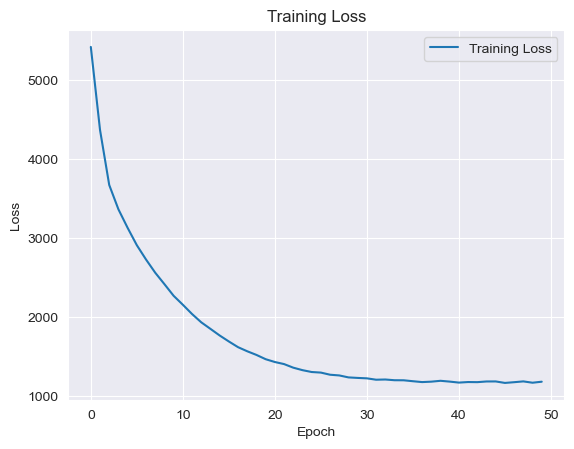

Training Loss: 1159.3104248046875


In [574]:
# Evaluate the model
train_loss = lstm_model.evaluate(X_train_lstm, y_train, verbose=0)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print(f"Training Loss: {train_loss}")

In [575]:
y_pred_lstm = lstm_model.predict(X_test_lstm)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
print("RMSE for LSTM:", rmse_lstm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step
RMSE for LSTM: 35.82437759538787


In [576]:
import pickle
# open a file, where you ant to store the data
file = open('lstm_model_final_2.pkl', 'wb')

# dump information to that file
pickle.dump(lstm_model, file)
#we use a pickle file to store the data in a byte stream format

In [577]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Calculate Mean Absolute Error (MAE)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print("MAE for LSTM:", mae_lstm)

# Calculate R-squared (R2)
r2_lstm = r2_score(y_test, y_pred_lstm)
print("R-squared (R2) for LSTM:", r2_lstm)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print("MAPE for LSTM:", mape_lstm)


MAE for LSTM: 28.834737776594373
R-squared (R2) for LSTM: -0.07218201586163309
MAPE for LSTM: 0.6026477626717192


In [578]:
from sklearn.metrics import mean_squared_error

# Obtain predictions from each model
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Combine predictions using weighted average
# Adjust the weights based on the performance of each model
weight_lgbm = 0.6
weight_lstm = 0.4

# Combine predictions using weighted average
y_pred_hybrid = (weight_lgbm * y_pred_lgbm) +  (weight_lstm * y_pred_lstm)
print(y_pred_hybrid)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[58.40694654 72.46530715 64.26095536 ... 35.30014431 49.31039119
  55.04338439]
 [58.40694654 72.46530715 64.26095536 ... 35.30014431 49.31039119
  55.04338439]
 [58.40694654 72.46530715 64.26095536 ... 35.30014431 49.31039119
  55.04338439]
 ...
 [58.40676343 72.46512405 64.26077225 ... 35.2999612  49.31020809
  55.04320128]
 [58.40676343 72.46512405 64.26077225 ... 35.2999612  49.31020809
  55.04320128]
 [58.40694654 72.46530715 64.26095536 ... 35.30014431 49.31039119
  55.04338439]]


In [579]:
# Aggregate predictions of the ensemble model
y_pred_hybrid_aggregated = np.mean(y_pred_hybrid, axis=1)

# Calculate MAE for the hybrid model
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid_aggregated)
print("MAE for Hybrid Model:", mae_hybrid)

# Calculate R2 score for the hybrid model
r2_hybrid = r2_score(y_test, y_pred_hybrid_aggregated)
print("R2 Score for Hybrid Model:", r2_hybrid)

# Calculate MAPE for the hybrid model
mape_hybrid = mean_absolute_percentage_error(y_test, y_pred_hybrid_aggregated)
print("MAPE for Hybrid Model:", mape_hybrid)

MAE for Hybrid Model: 28.87672083376227
R2 Score for Hybrid Model: -0.0802089417047871
MAPE for Hybrid Model: 0.5991453764977936


In [580]:
y_pred_lstm = lstm_model.predict(X_test_lstm)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
print("RMSE for LSTM:", rmse_lstm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE for LSTM: 35.82437759538787


In [581]:
import pickle
# open a file, where you ant to store the data
file = open('lstm_model_final_2.pkl', 'wb')

# dump information to that file
pickle.dump(lstm_model, file)
#we use a pickle file to store the data in a byte stream format